In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import distance as sci_distance
from sklearn import cluster as sk_cluster

## 01 - Importando dados

In [92]:
df = pd.read_csv('dados.csv')
df_clientes = pd.read_csv('relatorio com cliente.csv')

C:\Users\hilarion\AppData\Local\Temp\1\ipykernel_12720\279799573.py:2: DtypeWarning: Columns (29,30,31,32) have mixed types. Specify dtype option on import or set low_memory=False.
  df_clientes = pd.read_csv('relatorio com cliente.csv')


## 02 - Analise e processamento dos dados

In [93]:
df_clientes = df_clientes.drop('Unnamed: 0', axis=1)
df_clientes = df_clientes.drop('Data extracao', axis=1)
df = df.drop('Unnamed: 0', axis=1)

### Dividindo o data frame para reduzir o tempo de processamento do for

In [94]:
df_clientes = df_clientes[['Origem','Cliente']]

#### Dropando linhas com valores nulos

In [95]:
df.dropna(inplace=True)
df_clientes.dropna(inplace=True)

#### Transformando dados para seus respectivos formatos

In [96]:
df_clientes['Origem'] = df_clientes['Origem'].apply(int)
df_clientes['Cliente'] = df_clientes['Cliente'].apply(int)
df['Origem'] = df['Origem'].apply(int)
df['menor_data'] = pd.to_datetime(df['menor_data'], dayfirst = True)
df['maior_data'] = pd.to_datetime(df['maior_data'], dayfirst = True)

#### Dropando duplicatas  e mantendo a primeira ocorrencia

In [97]:
df.drop_duplicates(subset=['Origem'], keep='first')
df_clientes.drop_duplicates(subset=['Origem'], keep='first')

,Origem,Cliente
0,50901088,12041
1,50956140,12041
2,130635822,12041
4,130635836,12041
5,130635861,12041
...,...,...
1048061,134232187,805899
1048104,134165405,629219
1048105,133765239,832660
1048109,134166010,73326


#### Juntando os Data frames

In [98]:
m = pd.merge(df, df_clientes, how = 'left', on = ['Origem'])

In [99]:
m = m[m['menor_data'].notna()]
m = m[m['maior_data'].notna()]
m = m[m['Cliente'].notna()]

In [100]:
m['Cliente'] = m['Cliente'].apply(int)

#### Calculando os dias em aberto

In [101]:
m['tempo_aberto'] = m['maior_data'] - m['menor_data']

In [102]:
m.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720181 entries, 0 to 737558
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype          
---  ------        --------------   -----          
 0   Origem        720181 non-null  int64          
 1   menor_data    720181 non-null  datetime64[ns] 
 2   maior_data    720181 non-null  datetime64[ns] 
 3   Cliente       720181 non-null  int64          
 4   tempo_aberto  720181 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(2), timedelta64[ns](1)
memory usage: 33.0 MB


In [103]:
m['tempo_aberto'] = pd.to_numeric(m['tempo_aberto'].dt.days, downcast='integer')

#### Calculando desvio padrão para categorização

In [104]:
m = m.groupby('Cliente').agg({'tempo_aberto':'std'})

In [105]:
m['tempo_aberto'].fillna(0, inplace=True)

#### Gerando grafico para facilitar a visualização dos periodos que as OV's permanceram em aberto

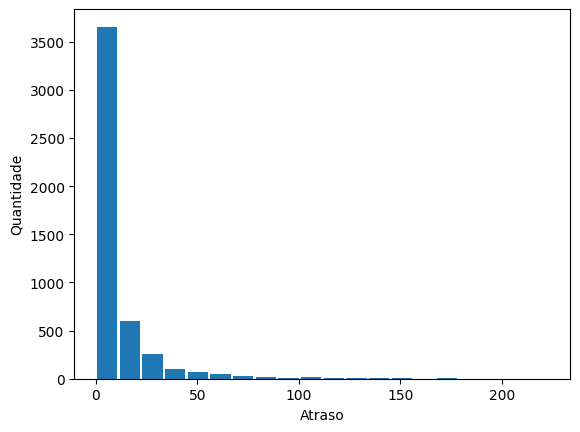

In [106]:
plt.xlabel('Atraso')
plt.ylabel('Quantidade')
plt.hist(m, 20, rwidth=0.9)
plt.show()

In [107]:
m = m.sort_values(by='tempo_aberto')

In [109]:
m = m.reset_index()

#### Categorizador por tempo aberto

In [120]:
def categorizador(time):
    if time <= 1:
        return 'A'
    elif time > 1 and time <= 10:
        return 'B'
    else:
        return 'C'

In [121]:
m['Categoria'] = m.apply(lambda row : categorizador(time = row['tempo_aberto']), axis=1)

In [122]:
m.head()

,Cliente,tempo_aberto,Categoria
0,5,0.0,A
1,827716,0.0,A
2,827728,0.0,A
3,827854,0.0,A
4,827861,0.0,A


In [ ]:
relatorio_final = pd.read_csv('relatorio com cliente.csv')

In [127]:
categoria = m[['Cliente', 'Categoria']]

In [129]:
df = pd.merge(relatorio_final, m, how = 'left', on = ['Cliente'])

In [131]:
df.to_csv('m.csv')